## Set-up

In [1]:
%run functions.ipynb
%matplotlib inline

In [2]:
import tweepy
import configparser
import os
import json
import GetOldTweets3 as got
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
import string
import random
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
import csv
import math

from collections import Counter

In [3]:
jan_tweets = load_tweets('data/1/tweets_2020-01-01_to_2020-02-01.json')
feb_tweets = load_tweets('data/2/tweets_2020-02-01_to_2020-03-01.json')
mar_tweets = load_tweets('data/3/tweets_2020-03-01_to_2020-04-01.json')
apr_tweets = load_tweets('data/4/tweets_2020-04-01_to_2020-05-01.json')
all_time = load_tweets('data/all_time/tweets_2020-01-01_to_2020-05-01.json')
trump_tweets = load_tweets('data/all_time/realdonaldtrump_2020-01-01_to_2020-05-01.json')
pompeo_tweets = load_tweets('data/all_time/secpompeo_2020-01-01_to_2020-05-01.json')
racist_tweets = load_tweets('data/all_time/racist_tweets_2020-01-01_to_2020-05-01.json')

In [78]:
len(jan_tweets), len(feb_tweets), len(mar_tweets), len(apr_tweets)

(7, 138, 1702, 2962)

In [80]:
len(all_time)

3100

In [81]:
len(trump_tweets),len(pompeo_tweets)

(8, 8)

In [82]:
len(racist_tweets)

1840

In [4]:
corpus1 = json.load(open('data/corpus_index1.json'))
corpus2 = json.load(open('data/corpus_index2.json'))
corpus3 = json.load(open('data/corpus_index3.json'))
corpus4 = json.load(open('data/corpus_index4.json'))
corp_all = json.load(open('data/corpus_index_all.json'))

In [79]:
len(corpus1), len(corpus2),len(corpus3),len(corpus4)

(8, 124, 611, 615)

In [75]:
len(corp_all)

1358

## How Trump has fueled the discussion on COVID-19 and Asian-American racism

In [5]:
d = Counter(tweet['date'][:10] for tweet in all_time)
dftweets_raw = pd.DataFrame.from_dict(d, orient='index').reset_index()
dftweets_cleaned = dftweets_raw.rename(columns = {"index": "date", 0: "count"})
dftweets = dftweets_cleaned.sort_values(by='date')
dftweets.head()

,date,count
91,2020-01-27,1
90,2020-01-28,1
89,2020-01-30,2
88,2020-01-31,3
87,2020-02-01,3


In [6]:
d = Counter(tweet['date'][:10] for tweet in trump_tweets)
dftrump_raw = pd.DataFrame.from_dict(d, orient='index').reset_index()
dftrump_cleaned = dftrump_raw.rename(columns = {"index": "date", 0: "count"})
dftrump = dftrump_cleaned.sort_values(by='date')
dftrump

,date,count
4,2020-03-16,1
3,2020-03-17,1
2,2020-03-18,4
1,2020-03-22,1
0,2020-03-23,1


In [7]:
d = Counter(tweet['date'][:10] for tweet in pompeo_tweets)
dfpompeo_raw = pd.DataFrame.from_dict(d, orient='index').reset_index()
dfpompeo_cleaned = dfpompeo_raw.rename(columns = {"index": "date", 0: "count"})
dfpompeo = dfpompeo_cleaned.sort_values(by='date')
dfpompeo

,date,count
3,2020-03-13,1
2,2020-03-20,1
1,2020-03-23,3
0,2020-03-25,3


In [8]:
d = Counter(article['Date'] for article in corp_all)
dflexis_raw = pd.DataFrame.from_dict(d, orient='index').reset_index()
dflexis_cleaned = dflexis_raw.rename(columns = {"index": "date", 0: "count"})
dflexis = dflexis_cleaned.sort_values(by='date')
dflexis.head()

,date,count
3,2020-01-24,1
4,2020-01-25,1
2,2020-01-29,1
0,2020-01-31,4
1,2020-02-01,2


In [9]:
d = Counter(tweet['date'][:10] for tweet in racist_tweets)
dfracist_tweets_raw = pd.DataFrame.from_dict(d, orient='index').reset_index()
dfracist_tweets_cleaned = dfracist_tweets_raw.rename(columns = {"index": "date", 0: "count"})
dfracist_tweets = dfracist_tweets_cleaned.sort_values(by='date')
dfracist_tweets.head()

,date,count
94,2020-01-20,1
93,2020-01-22,2
92,2020-01-23,6
91,2020-01-24,5
90,2020-01-25,14


([<matplotlib.axis.XTick at 0x7ff98985a908>,
 <a list of 18 Text xticklabel objects>)

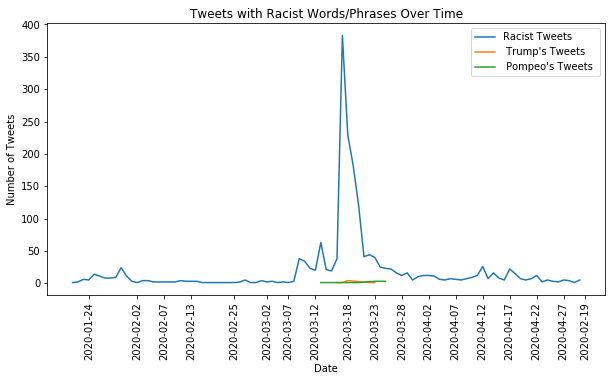

In [10]:
fig = plt.figure(figsize = (10,5))

ax2 = fig.add_subplot(1, 1, 1)
ax2.set_title("Tweets with Racist Words/Phrases Over Time")
ax2.set_xlabel("Date")
ax2.set_ylabel("Number of Tweets")
plt.plot('date', 'count', data=dfracist_tweets, label='Racist Tweets')
plt.plot('date', 'count', data=dftrump, label=' Trump\'s Tweets ')
plt.plot('date', 'count', data=dfpompeo, label=' Pompeo\'s Tweets ')
plt.legend()
plt.xticks(dflexis["date"][::5], rotation = 90)

([<matplotlib.axis.XTick at 0x7ff988fb8630>,
 <a list of 18 Text xticklabel objects>)

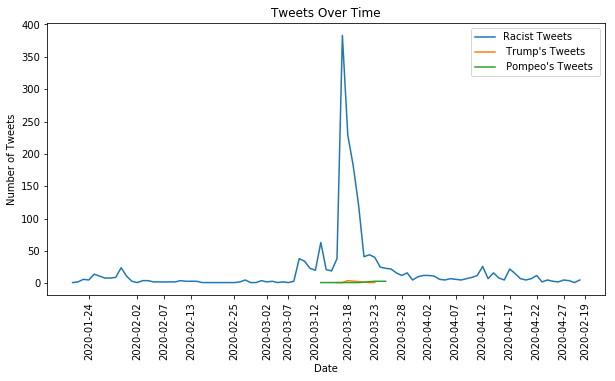

In [11]:
fig = plt.figure(figsize = (10,5))

ax2 = fig.add_subplot(1, 1, 1)
ax2.set_title("Tweets Over Time")
ax2.set_xlabel("Date")
ax2.set_ylabel("Number of Tweets")
plt.plot('date', 'count', data=dfracist_tweets, label='Racist Tweets')
plt.plot('date', 'count', data=dftrump, label=' Trump\'s Tweets ')
plt.plot('date', 'count', data=dfpompeo, label=' Pompeo\'s Tweets ')
plt.legend()
plt.xticks(dflexis["date"][::5], rotation = 90)

([<matplotlib.axis.XTick at 0x7ff988eb7cc0>,
 <a list of 18 Text xticklabel objects>)

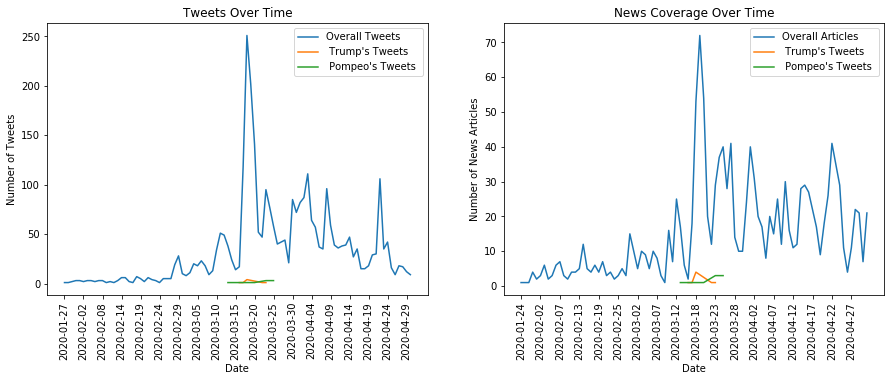

In [12]:
fig = plt.figure(figsize = (15,5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Tweets Over Time")
ax1.set_xlabel("Date")
ax1.set_ylabel("Number of Tweets")
plt.plot('date', 'count', data=dftweets, label='Overall Tweets')
plt.plot('date', 'count', data=dftrump, label=' Trump\'s Tweets ')
plt.plot('date', 'count', data=dfpompeo, label=' Pompeo\'s Tweets ')
plt.legend()
plt.xticks(dftweets["date"][::5], rotation = 90)

ax2 = fig.add_subplot(1, 2, 2)
ax2.set_title("News Coverage Over Time")
ax2.set_xlabel("Date")
ax2.set_ylabel("Number of News Articles")
plt.plot('date', 'count', data=dflexis, label='Overall Articles')
plt.plot('date', 'count', data=dftrump, label=' Trump\'s Tweets ')
plt.plot('date', 'count', data=dfpompeo, label=' Pompeo\'s Tweets ')
plt.legend()
plt.xticks(dflexis["date"][::5], rotation = 90)

## Word Frequency and Bigram/Trigram Distribution

<b>All-time</b>

In [13]:
all_t_word_dist=Counter()
all_t_bigram_dist=Counter()
all_t_trigram_dist=Counter()

all_t_tokens = []
for tweet in all_time:
    text = tweet['text'].replace('&amp;', '&').replace('”', '').replace('\'', '').replace('’', '').replace('“', '')
    toks = tokenize(text, lowercase=True, strip_chars=string.punctuation)
    all_t_tokens.extend(toks)

all_t_bigrams=get_ngram_tokens(all_t_tokens,2)
all_t_trigrams=get_ngram_tokens(all_t_tokens,3)

all_t_word_dist.update(all_t_tokens)
all_t_bigram_dist.update(all_t_bigrams)
all_t_trigram_dist.update(all_t_trigrams)

## Examining tweets with racist words/phrases

**Word, Bigram, Trigram Distributions**

In [14]:
racist_word_dist=Counter()
racist_bigram_dist=Counter()
racist_trigram_dist=Counter()

racist_tokens = []
for tweet in racist_tweets:
    text = tweet['text'].replace('&amp;', '&').replace('”', '').replace('\'', '').replace('’', '').replace('“', '')
    toks = tokenize(text, lowercase=True, strip_chars=string.punctuation)
    racist_tokens.extend(toks)

racist_bigrams=get_ngram_tokens(racist_tokens,2)
racist_trigrams=get_ngram_tokens(racist_tokens,3)

racist_word_dist.update(racist_tokens)
racist_bigram_dist.update(racist_bigrams)
racist_trigram_dist.update(racist_trigrams)

In [15]:
racist_queries = ["ching chong",'ching','chong', 'chink', 'chingchong', "kung flu",'kung','fu', "kung fu flu", "ching chong virus",'coronavirus', 'corona virus', 'covid19', 'covid 19']

In [16]:
s_racist_tweets_tokens = racist_tokens
words_to_remove= stopwords.words('english')+racist_queries
for tweet in list(s_racist_tweets_tokens):
    if tweet in words_to_remove:
        s_racist_tweets_tokens.remove(tweet)

s_racist_tweets_tokens = [x for x in s_racist_tweets_tokens if not x.startswith('https')]
racist_tweets_wfreq = Counter(s_racist_tweets_tokens)

In [17]:
s_racist_bigrams = get_ngram_tokens(s_racist_tweets_tokens,2)
s_racist_bigrams_dist = Counter(s_racist_bigrams)
s_racist_trigrams = get_ngram_tokens(s_racist_tweets_tokens,3)
s_racist_trigrams_dist = Counter(s_racist_trigrams)

In [18]:
racist_bigram_dist.most_common(100)

[('ching chong', 1678),
 ('chong virus', 1398),
 ('the ching', 559),
 ('kung flu', 428),
 ('it the', 274),
 ('call it', 208),
 ('virus ching', 156),
 ('calling it', 143),
 ('chinese virus', 130),
 ('virus is', 102),
 ('virus i', 88),
 ('virus or', 80),
 ('the chinese', 80),
 ('chingchong virus', 78),
 ('chong kung', 73),
 ('china virus', 72),
 ('wuhan virus', 70),
 ('virus the', 68),
 ('it is', 68),
 ('virus kung', 59),
 ('called it', 56),
 ('flu ching', 54),
 ('the kung', 53),
 ('virus and', 53),
 ('flu or', 50),
 ('it ching', 49),
 ('to call', 47),
 ('its the', 47),
 ('is a', 46),
 ('is the', 43),
 ('virus chinese', 42),
 ('of the', 41),
 ('or ching', 40),
 ('in the', 40),
 ('wuhan ching', 39),
 ('called the', 39),
 ('virus you', 38),
 ('about the', 38),
 ('chinese wuhan', 37),
 ('or the', 37),
 ('the chingchong', 37),
 ('the wuhan', 36),
 ('to the', 36),
 ('virus wuhan', 35),
 ('i dont', 34),
 ('i call', 34),
 ('to be', 34),
 ('flu is', 33),
 ('the virus', 33),
 ('for the', 32),
 ('

In [19]:
s_racist_bigrams_dist.most_common(30)

[('virus virus', 230),
 ('chinese virus', 140),
 ('call virus', 111),
 ('virus flu', 95),
 ('flu virus', 91),
 ('calling virus', 87),
 ('china virus', 82),
 ('wuhan virus', 77),
 ('called virus', 68),
 ('virus chinese', 63),
 ('wuhan flu', 57),
 ('virus wuhan', 46),
 ('virus racist', 40),
 ('chinese wuhan', 38),
 ('virus china', 36),
 ('flu flu', 33),
 ('virus call', 32),
 ('like virus', 25),
 ('virus would', 24),
 ('virus thats', 23),
 ('corona virus', 23),
 ('virus like', 22),
 ('flu foo', 22),
 ('foo man', 22),
 ('man achoo', 22),
 ('achoo chinavirus', 21),
 ('chinkachoo riceafluie', 21),
 ('riceafluie fluinease', 21),
 ('fluinease flu', 21),
 ('call chinese', 20)]

In [20]:
racist_tweets_wfreq.most_common()

[('virus', 1992),
 ('flu', 626),
 ('chinese', 284),
 ('call', 242),
 ('china', 235),
 ('wuhan', 198),
 ('racist', 194),
 ('calling', 179),
 ('like', 138),
 ('people', 128),
 ('called', 127),
 ('dont', 110),
 ('im', 90),
 ('get', 88),
 ('would', 72),
 ('thats', 63),
 ('name', 63),
 ('say', 60),
 ('one', 56),
 ('think', 56),
 ('trump', 55),
 ('funny', 52),
 ('right', 50),
 ('want', 44),
 ('asian', 44),
 ('man', 44),
 ('corona', 43),
 ('na', 42),
 ('better', 42),
 ('cant', 41),
 ('need', 41),
 ('said', 40),
 ('know', 40),
 ('shit', 40),
 ('also', 39),
 ('bat', 39),
 ('stop', 37),
 ('time', 34),
 ('even', 33),
 ('go', 33),
 ('something', 33),
 ('world', 33),
 ('fuck', 33),
 ('really', 32),
 ('fucking', 32),
 ('chinavirus', 32),
 ('going', 31),
 ('lets', 30),
 ('mean', 30),
 ('ok', 29),
 ('u', 29),
 ('got', 29),
 ('well', 29),
 ('cough', 29),
 ('good', 29),
 ('way', 29),
 ('comedian', 29),
 ('came', 28),
 ('someone', 28),
 ('us', 28),
 ('racism', 27),
 ('isnt', 27),
 ('give', 27),
 ('saying

In [21]:
s_racist_trigrams_dist.most_common(10)

[('virus chinese virus', 41),
 ('chinese wuhan flu', 30),
 ('virus virus virus', 30),
 ('virus wuhan virus', 30),
 ('chinese virus virus', 23),
 ('flu foo man', 22),
 ('foo man achoo', 22),
 ('man achoo chinavirus', 21),
 ('riceafluie fluinease flu', 21),
 ('achoo chinavirus chinkachoo', 20)]

**Collocation**

In [66]:
tweet_colls = Counter()
tweet_colls.update(collocates(racist_tokens, 'funny',win=[5,5]))

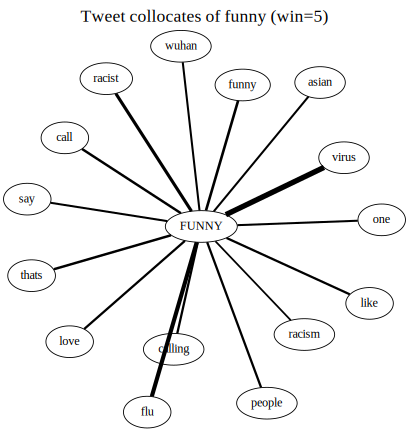

In [67]:
plot_collocates('funny', tweet_colls, num=15, threshold=2,
                title='Tweet collocates of funny (win=5)')

**KWIC Concordances**

In [68]:
racist_kwic = make_kwic('funny', racist_tokens)
print_kwic(sort_kwic(racist_kwic,['R1']))

                  beieve virus good name  funny  asf time need laughter
                 corona virus felt would  funny  call random name called
              personal fav yellow rabies  funny  cause true never heard
                   stuff like virus isnt  funny  chinese virus wuhan virus
                        wad sad ps virus  funny  comedian resorts racism asian
           asians thoughts ceased eating  funny  creatures like batssnakesfor virus
                  helli call virus virus  funny  cry something like think
          fighting funny virus offensive  funny  delusional nobody said didnt
flu出出气也没啥。要看川普的对ccp实际行动。现在油价便宜，派个航母和几架飞机出去转一圈也只是做做样子。希望川普别怂！ actually flu pretty  funny  didnt like try clear
                    someone gc say virus  funny  didnt laugh alright lets
                  saying virus shit isnt  funny  embarrassing hear kid sound
                     trust fund baby flu  funny  flu racist virus eu
                    dont think virus flu  funny  go directly de

In [64]:
racist_kwic = make_kwic('trump', racist_tokens)
print_kwic(sort_kwic(racist_kwic,['R1']))

             aint catching virus kungflu  trump  3 tweets away calling
              perhamps call virus donald  trump  afraid call huh sir
                something couple facts 1  trump  already done things 2
                  sour sickness 1 donald  trump  bill maher may refer
             body ⁦jimcarrey⁩ virus want  trump  call kenyan virus wouldnt
                  away virus youre right  trump  call call chinese wuhan
          riceafluie virus treating like  trump  called virus ffs treating
      virus originated china sopresident  trump  callit truth told virus
                    flu poopoo flu virus  trump  calls chinese virus chinesevirus
                      tears dont care mr  trump  calls chinese virus flu
                novel also also everyone  trump  chingy chingy virus wuhan
messed schedule completely realdonaldtrump  trump  corona trump2020 hey poser
               people always trying hate  trump  dancareyching take virus flu
             speak chinese virus wait

## Tweets over time

### Bigrams and Trigrams

<b>January</b>

In [22]:
jan_t_word_dist=Counter()
jan_t_bigram_dist=Counter()
jan_t_trigram_dist=Counter()

jan_t_tokens = []
for tweet in jan_tweets:
    text = tweet['text'].replace('&amp;', '&').replace('”', '').replace('\'', '').replace('’', '').replace('“', '')
    toks = tokenize(text, lowercase=True, strip_chars=string.punctuation)
    jan_t_tokens.extend(toks)

jan_t_bigrams=get_ngram_tokens(jan_t_tokens,2)
jan_t_trigrams=get_ngram_tokens(jan_t_tokens,3)

jan_t_word_dist.update(jan_t_tokens)
jan_t_bigram_dist.update(jan_t_bigrams)
jan_t_trigram_dist.update(jan_t_trigrams)

In [23]:
top_20_bigrams = jan_t_bigram_dist.most_common(20)
top_20_trigrams = jan_t_trigram_dist.most_common(20)

In [24]:
bigram_df = pd.DataFrame(top_20_bigrams, columns = ['Bigram','Freq'])
bigram_list = list(bigram_df['Bigram'])
trigram_df = pd.DataFrame(top_20_trigrams, columns = ['Trigram','Freq'])
trigram_list = list(trigram_df['Trigram'])

In [25]:
rank = list(range(1, 21))
jan_bitrigram = pd.DataFrame(rank, columns = ['Rank'])
jan_bitrigram['Bigram']=bigram_list
jan_bitrigram['Trigram']=trigram_list
jan_bitrigram.set_index('Rank', inplace=True)

In [26]:
jan_bitrigram

,Bigram,Trigram
Rank,,
1,asian american,the corona virus
2,the corona,my asian american
3,corona virus,if my generation
4,as an,my generation is
5,from the,generation is so
6,my asian,shame on you
7,if my,on you tangcentercal
8,my generation,you tangcentercal this
9,generation is,tangcentercal this happens


<b>February</b>

In [27]:
feb_t_word_dist=Counter()
feb_t_bigram_dist=Counter()
feb_t_trigram_dist=Counter()

feb_t_tokens = []
for tweet in feb_tweets:
    text = tweet['text'].replace('&amp;', '&').replace('”', '').replace('\'', '').replace('’', '').replace('“', '')
    toks = tokenize(text, lowercase=True, strip_chars=string.punctuation)
    feb_t_tokens.extend(toks)

feb_t_bigrams=get_ngram_tokens(feb_t_tokens,2)
feb_t_trigrams=get_ngram_tokens(feb_t_tokens,3)

feb_t_word_dist.update(feb_t_tokens)
feb_t_bigram_dist.update(feb_t_bigrams)
feb_t_trigram_dist.update(feb_t_trigrams)

In [28]:
feb_top_20_bigrams = feb_t_bigram_dist.most_common(20)
feb_top_20_trigrams = feb_t_trigram_dist.most_common(20)
feb_bigram_df = pd.DataFrame(feb_top_20_bigrams, columns = ['Bigram','Freq'])
feb_bigram_list = list(feb_bigram_df['Bigram'])
feb_trigram_df = pd.DataFrame(feb_top_20_trigrams, columns = ['Trigram','Freq'])
feb_trigram_list = list(feb_trigram_df['Trigram'])

In [29]:
rank = list(range(1, 21))
feb_bitrigram = pd.DataFrame(rank, columns = ['Rank'])
feb_bitrigram['Bigram']=feb_bigram_list
feb_bitrigram['Trigram']=feb_trigram_list
feb_bitrigram.set_index('Rank', inplace=True)

In [30]:
feb_bitrigram

,Bigram,Trigram
Rank,,
1,asian american,asian american lawmakers
2,american lawmakers,american lawmakers urge
3,the coronavirus,lawmakers urge congress
4,congress members,urge congress members
5,to help,congress members to
6,help stop,members to help
7,lawmakers urge,to help stop
8,urge congress,help stop coronavirusfueled
9,members to,stop coronavirusfueled xenophobia


<b>March</b>

In [31]:
mar_t_word_dist=Counter()
mar_t_bigram_dist=Counter()
mar_t_trigram_dist=Counter()

mar_t_tokens = []
for tweet in mar_tweets:
    text = tweet['text'].replace('&amp;', '&').replace('”', '').replace('\'', '').replace('’', '').replace('“', '')
    toks = tokenize(text, lowercase=True, strip_chars=string.punctuation)
    mar_t_tokens.extend(toks)

mar_t_bigrams=get_ngram_tokens(mar_t_tokens,2)
mar_t_trigrams=get_ngram_tokens(mar_t_tokens,3)

mar_t_word_dist.update(mar_t_tokens)
mar_t_bigram_dist.update(mar_t_bigrams)
mar_t_trigram_dist.update(mar_t_trigrams)

In [32]:
mar_top_20_bigrams = mar_t_bigram_dist.most_common(20)
mar_top_20_trigrams = mar_t_trigram_dist.most_common(20)
mar_bigram_df = pd.DataFrame(mar_top_20_bigrams, columns = ['Bigram','Freq'])
mar_bigram_list = list(mar_bigram_df['Bigram'])
mar_trigram_df = pd.DataFrame(mar_top_20_trigrams, columns = ['Trigram','Freq'])
mar_trigram_list = list(mar_trigram_df['Trigram'])

In [33]:
rank = list(range(1, 21))
mar_bitrigram = pd.DataFrame(rank, columns = ['Rank'])
mar_bitrigram['Bigram']=mar_bigram_list
mar_bitrigram['Trigram']=mar_trigram_list
mar_bitrigram.set_index('Rank', inplace=True)

In [34]:
mar_bitrigram

,Bigram,Trigram
Rank,,
1,asian american,the chinese virus
2,chinese virus,the asian american
3,the chinese,an asian american
4,the coronavirus,asian american community
5,of the,asian american and
6,the asian,it the chinese
7,an asian,calling it the
8,the virus,as an asian
9,in the,our asian american


<b>April</b>

In [35]:
apr_t_word_dist=Counter()
apr_t_bigram_dist=Counter()
apr_t_trigram_dist=Counter()

apr_t_tokens = []
for tweet in apr_tweets:
    text = tweet['text'].replace('&amp;', '&').replace('”', '').replace('\'', '').replace('’', '').replace('“', '')
    toks = tokenize(text, lowercase=True, strip_chars=string.punctuation)
    apr_t_tokens.extend(toks)

apr_t_bigrams=get_ngram_tokens(apr_t_tokens,2)
apr_t_trigrams=get_ngram_tokens(apr_t_tokens,3)

apr_t_word_dist.update(apr_t_tokens)
apr_t_bigram_dist.update(apr_t_bigrams)
apr_t_trigram_dist.update(apr_t_trigrams)

In [36]:
apr_top_20_bigrams = apr_t_bigram_dist.most_common(20)
apr_top_20_trigrams = apr_t_trigram_dist.most_common(20)
apr_bigram_df = pd.DataFrame(apr_top_20_bigrams, columns = ['Bigram','Freq'])
apr_bigram_list = list(apr_bigram_df['Bigram'])
apr_trigram_df = pd.DataFrame(apr_top_20_trigrams, columns = ['Trigram','Freq'])
apr_trigram_list = list(apr_trigram_df['Trigram'])

In [37]:
rank = list(range(1, 21))
apr_bitrigram = pd.DataFrame(rank, columns = ['Rank'])
apr_bitrigram['Bigram']=apr_bigram_list
apr_bitrigram['Trigram']=apr_trigram_list
apr_bitrigram.set_index('Rank', inplace=True)

In [38]:
apr_bitrigram

,Bigram,Trigram
Rank,,
1,asian american,an asian american
2,an asian,asian american family
3,american family,fears made him
4,made him,made him stab
5,coronavirus fears,him stab an
6,him stab,says coronavirus fears
7,fears made,coronavirus fears made
8,stab an,stab an asian
9,racist says,family as they


### Comparing key words across time

Tweet Keyword Frequency by Month


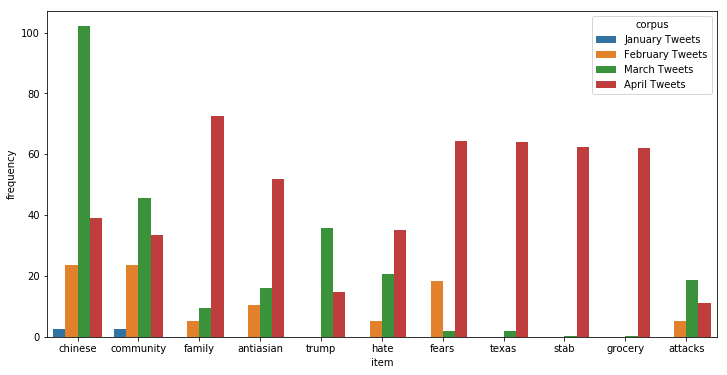

In [65]:
comparison_data = compare_items(jan_t_word_dist, feb_t_word_dist,mar_t_word_dist,apr_t_word_dist,['chinese', 'community', 'family', 'antiasian', 'trump', 'hate', 'fears', 'texas', 'stab', 'grocery', 'attacks'])
print('Tweet Keyword Frequency by Month')
comparison_plot(comparison_data, label1= "January Tweets", label2= "February Tweets", label3= "March Tweets", label4= "April Tweets")

## Data cleaning

### Find most common words other than the words in the query search

In [40]:
queries = ['asianamerican', 'asian', 'american', \
            'racism', 'racist', 'xenophobia', 'racism', 'racist', 'xenophobia', \
            'coronavirus', 'corona virus', 'covid19', 'covid 19', 'pandemic', 'virus', "chinese virus", "china virus", \
            'coronavirus', 'covid19', 'pandemic', 'chinavirus', 'chinesevirus']
stripped_tweets_tokens = all_t_tokens
words_to_remove= stopwords.words('english')+queries
for tweet in list(stripped_tweets_tokens):
    if tweet in words_to_remove:
        stripped_tweets_tokens.remove(tweet)

stripped_tweets_tokens = [x for x in stripped_tweets_tokens if not x.startswith('https')]
stripped_tweets_wfreq = Counter(stripped_tweets_tokens)

In [41]:
stripped_tweets_wfreq.most_common(30)

[('chinese', 735),
 ('people', 436),
 ('community', 389),
 ('im', 317),
 ('family', 308),
 ('calling', 306),
 ('china', 299),
 ('antiasian', 275),
 ('trump', 258),
 ('says', 256),
 ('americans', 248),
 ('us', 248),
 ('made', 246),
 ('stop', 245),
 ('hate', 244),
 ('fears', 241),
 ('texas', 233),
 ('like', 219),
 ('communities', 218),
 ('stab', 217),
 ('grocery', 217),
 ('shopped', 213),
 ('dont', 190),
 ('via', 185),
 ('call', 179),
 ('amid', 173),
 ('time', 163),
 ('attacks', 147),
 ('two', 141),
 ('leaders', 141)]

## How distributions change over time

<b> We'll first work with old Tweets.</b>
- Combine January and February Tweets

In [42]:
old_tweets = DictListUpdate(jan_tweets,feb_tweets)

In [43]:
old_tweets_tokens = []
for tweet in old_tweets:
    text = tweet['text'].replace('&amp;', '&').replace('”', '').replace('\'', '').replace('’', '').replace('“', '')
    toks = tokenize(text, lowercase=True, strip_chars=string.punctuation)
    old_tweets_tokens.extend(toks)

In [44]:
stripped_oldtweets_tokens = old_tweets_tokens
words_to_remove= stopwords.words('english')+queries
for tweet in list(stripped_oldtweets_tokens):
    if tweet in words_to_remove:
        stripped_oldtweets_tokens.remove(tweet)

stripped_oldtweets_tokens = [x for x in stripped_oldtweets_tokens if not x.startswith('https')]
stripped_oldtweets_wfreq = Counter(stripped_oldtweets_tokens)

In [45]:
stripped_oldtweets_wfreq.most_common(30)

[('stop', 34),
 ('lawmakers', 31),
 ('help', 25),
 ('members', 22),
 ('congress', 19),
 ('spread', 18),
 ('urge', 16),
 ('coronavirusfueled', 16),
 ('rumors', 16),
 ('people', 14),
 ('via', 13),
 ('denounce', 11),
 ('outbreak', 11),
 ('party', 11),
 ('way', 10),
 ('community', 10),
 ('like', 10),
 ('americans', 10),
 ('chinese', 10),
 ('stereotypes', 9),
 ('corona', 9),
 ('hands', 8),
 ('dont', 8),
 ('communities', 8),
 ('im', 8),
 ('businesses', 8),
 ('best', 7),
 ('wash', 7),
 ('perpetuate', 7),
 ('china', 7)]

<b> Now, let's look at recent Tweets. </b>
- Combine March and April Tweets

In [46]:
recent_tweets = DictListUpdate(mar_tweets,apr_tweets)

In [47]:
recent_tweets_tokens = []
for tweet in recent_tweets:
    text = tweet['text'].replace('&amp;', '&').replace('”', '').replace('\'', '').replace('’', '').replace('“', '')
    toks = tokenize(text, lowercase=True, strip_chars=string.punctuation)
    recent_tweets_tokens.extend(toks)

In [48]:
stripped_recenttweets_tokens = recent_tweets_tokens
words_to_remove= stopwords.words('english')+queries
for tweet in list(stripped_recenttweets_tokens):
    if tweet in words_to_remove:
        stripped_recenttweets_tokens.remove(tweet)

stripped_recenttweets_tokens = [x for x in stripped_recenttweets_tokens if not x.startswith('https')]
stripped_recenttweets_wfreq = Counter(stripped_recenttweets_tokens)

In [49]:
stripped_recenttweets_wfreq.most_common(30)

[('chinese', 725),
 ('people', 422),
 ('community', 379),
 ('im', 309),
 ('family', 306),
 ('calling', 302),
 ('china', 292),
 ('antiasian', 271),
 ('trump', 258),
 ('says', 254),
 ('us', 245),
 ('made', 245),
 ('hate', 242),
 ('americans', 238),
 ('fears', 234),
 ('texas', 233),
 ('stab', 217),
 ('grocery', 217),
 ('shopped', 213),
 ('stop', 211),
 ('communities', 210),
 ('like', 209),
 ('dont', 182),
 ('call', 178),
 ('via', 172),
 ('amid', 167),
 ('time', 158),
 ('attacks', 145),
 ('two', 138),
 ('leaders', 135)]

### Comparing with a keyness analysis

In [50]:
old_size = len(stripped_oldtweets_tokens)
recent_size = len(stripped_recenttweets_tokens)
top_old = stripped_oldtweets_wfreq.most_common(30)
top_recent = stripped_recenttweets_wfreq.most_common(30)

In [53]:
print("{: <20}{: <8}{:}\t\t{: <10}{:}\t{:}".format('word', 'old', 'norm_old', 'recent', 'norm_recent', 'LL'))
print("="*80)

row_template = "{: <20}{: <8}{:0.2f}\t\t{: <10}{:0.2f}\t{: 0.2f}"

for word, freq in top_old:
    old = freq
    recent = stripped_recenttweets_wfreq.get(word,0)
    norm_old = old/old_size * 1000
    norm_recent = recent/recent_size * 1000

    LL = 0 if recent==0 else log_likelihood(old, old_size, recent, recent_size)
    print(row_template.format(word, old, norm_old, recent, norm_recent, LL))

word                old     norm_old		recent    norm_recent	LL
stop                34      17.88		211       4.95	 35.47
lawmakers           31      16.30		25        0.59	 120.66
help                25      13.14		78        1.83	 50.28
members             22      11.57		56        1.31	 50.80
congress            19      9.99		39        0.92	 49.84
spread              18      9.46		86        2.02	 25.17
urge                16      8.41		22        0.52	 51.08
coronavirusfueled   16      8.41		17        0.40	 56.65
rumors              16      8.41		4         0.09	 81.22
people              14      7.36		422       9.91	-1.31
via                 13      6.83		172       4.04	 2.89
denounce            11      5.78		42        0.99	 18.89
outbreak            11      5.78		85        2.00	 8.43
party               11      5.78		13        0.31	 37.39
way                 10      5.26		55        1.29	 12.04
community           10      5.26		379       8.90	-3.20
like                10      5.26		209   

In [54]:
print("{: <20}{: <8}{:}\t\t{: <10}{:}\t{:}".format('word', 'old', 'norm_old', 'recent', 'norm_recent', 'LL'))
print("="*80)

row_template = "{: <20}{: <8}{:0.2f}\t\t{: <10}{:0.2f}\t{: 0.2f}"

for word, freq in top_recent:
    recent = freq
    old = stripped_oldtweets_wfreq.get(word,0)
    norm_old = old/old_size * 1000
    norm_recent = recent/recent_size * 1000

    LL = 0 if old==0 else log_likelihood(recent, recent_size, old, old_size)
    print(row_template.format(word, recent, norm_recent, old, norm_old, LL))

word                old     norm_old		recent    norm_recent	LL
chinese             725     17.02		10        5.26	 20.58
people              422     9.91		14        7.36	 1.31
community           379     8.90		10        5.26	 3.20
im                  309     7.25		8         4.21	 2.77
family              306     7.18		2         1.05	 15.21
calling             302     7.09		4         2.10	 8.96
china               292     6.85		7         3.68	 3.25
antiasian           271     6.36		4         2.10	 7.11
trump               258     6.06		0         0.00	 0.00
says                254     5.96		2         1.05	 11.41
us                  245     5.75		3         1.58	 7.87
made                245     5.75		1         0.53	 14.70
hate                242     5.68		2         1.05	 10.55
americans           238     5.59		10        5.26	 0.04
fears               234     5.49		7         3.68	 1.24
texas               233     5.47		0         0.00	 0.00
stab                217     5.09		0         0.00	 0

## What else fuels discussion?

In [55]:
silent_tweets = []
for tweet in all_time:
    if tweet['replies']==0:
        silent_tweets.append(tweet)

In [56]:
silent_tokens = []
for tweet in silent_tweets:
    text = tweet['text'].replace('&amp;', '&').replace('”', '').replace('\'', '').replace('’', '').replace('“', '')
    toks = tokenize(text, lowercase=True, strip_chars=string.punctuation)
    silent_tokens.extend(toks)

In [57]:
stripped_silent_tokens = silent_tokens
words_to_remove= stopwords.words('english')+queries
for tweet in list(stripped_silent_tokens):
    if tweet in words_to_remove:
        stripped_silent_tokens.remove(tweet)

stripped_silent_tokens = [x for x in stripped_silent_tokens if not x.startswith('https')]
stripped_silent_wfreq = Counter(stripped_silent_tokens)

In [58]:
discussion_creators = []
for tweet in all_time:
    if tweet['replies']>0:
        discussion_creators.append(tweet)

In [59]:
discussion_tokens = []
for tweet in discussion_creators:
    text = tweet['text'].replace('&amp;', '&').replace('”', '').replace('\'', '').replace('’', '').replace('“', '')
    toks = tokenize(text, lowercase=True, strip_chars=string.punctuation)
    discussion_tokens.extend(toks)

In [60]:
stripped_discussion_tokens = discussion_tokens
words_to_remove= stopwords.words('english')+queries
for tweet in list(stripped_discussion_tokens):
    if tweet in words_to_remove:
        stripped_discussion_tokens.remove(tweet)

stripped_discussion_tokens = [x for x in stripped_discussion_tokens if not x.startswith('https')]
stripped_discussion_wfreq = Counter(stripped_discussion_tokens)

In [61]:
silent_kwic = make_kwic('trump', stripped_silent_tokens)
silent_kwic_sample = random.sample(silent_kwic,30)
print_kwic(sort_kwic(silent_kwic_sample,['R1']))

               favoring phrase chinese —  trump  2020 campaign china hawks
             playing west fell americans  trump  2020 maher right like
           community fault many defended  trump  accused proven indeed condemning
  initiative starting important campaign  trump  called war americans knew
               trump cult member blaming  trump  called chinese gop im
              hes failed leader criminal  trump  calling chinese xenophobic unnecessary
         family held responsible matters  trump  calls chinese words consequences
           lanacondor lana condor called  trump  chinese rhetoric idea ramifications
       isnt thing spread realdonaldtrump  trump  chinese orangefaced never miss
        official calls ‘kungflu reporter  trump  defends ‘chinese flu well
                 fueling ugly az central  trump  distances crisis blaming china
                      still ok im donald  trump  doesnt understand like please
           httpewcom lana condor accuses  trump  endanger

In [62]:
discussion_kwic = make_kwic('trump', stripped_discussion_tokens)
discussion_kwic_sample = random.sample(discussion_kwic,30)
print_kwic(sort_kwic(discussion_kwic_sample,['R1']))

     trumps administration seems endemic  trump  administration covid19usa reporter weijia
             ie never mentioned anything  trump  also bc people using
      ushistory immigration nativism new  trump  attack ad falsely suggests
                    like said ever since  trump  called chinese sparked ask
       remark reflecting badly community  trump  calling chinese unacceptable americans
           ‘chinese attacks sf chronicle  trump  calling ‘chinese encourages americans
                   one bothered ask feel  trump  claims americans agree 100
        trump saidchinesevirus 1 support  trump  cost us 6 weeks
               reporter calling kung flu  trump  cultists pile garbage since
                      call chinese im mr  trump  dead wrong term along
  faces heightened discrimination donald  trump  disregards safety misnaming demgovs
          may administration make change  trump  even stated calling chinese
                  stake naming issue obv  trump  fanning flam